In [103]:
import numpy as np
from PIL import Image as pim
%matplotlib inline
import subprocess
import matplotlib.pyplot as plt
plt.gray()

In [2]:
import torch
import torch.nn.functional as F

In [3]:
images_list = subprocess.getoutput('ls images/').split('\n')

In [4]:
images_list

['0001677.jpg',
 '0002136.jpg',
 '0002395.jpg',
 '0002755.jpg',
 '0007932.jpg',
 '0010830.jpg',
 '0010950.jpg',
 '0011033.jpg']

In [5]:
images = [pim.open('images/'+i) for i in images_list]

In [7]:
np_images = [np.array(i).transpose((2,0,1)) for i in images]

Converting to grayscale images 

In [8]:
grayscaled_images = torch.Tensor([np.array([(i.sum(0)/3).astype('uint8') for i in np_images])])
grayscaled_images.shape

torch.Size([1, 8, 240, 320])

A Nx1x1 filter having only 1/N, so when convolved with the images, we get a tensor 1x1xHxW, where X[i,j] == mean(pixels[i][j])

In [9]:
mean_filter = np.ones((1,8,1,1))/len(grayscaled_images[0])
mean_filter.shape

(1, 8, 1, 1)

In [10]:
mean_image = F.conv2d(grayscaled_images,torch.Tensor(mean_filter))
mean_image.shape

torch.Size([1, 1, 240, 320])

In [11]:
centered_images = grayscaled_images - mean_image

In [12]:
centered_images.byte()[0][6]

tensor([[ 245,  245,  245,  ...,  243,  236,  208],
        [ 245,  245,  246,  ...,  234,  228,  208],
        [ 246,  246,  246,  ...,   17,   11,  253],
        ...,
        [ 121,  129,  139,  ...,  236,  239,  241],
        [  91,   97,  105,  ...,  235,  236,  236],
        [   0,  248,  238,  ...,  241,  238,  237]], dtype=torch.uint8)

In [121]:
centered_images.mean()    ## The image have now been centered

tensor(0.)

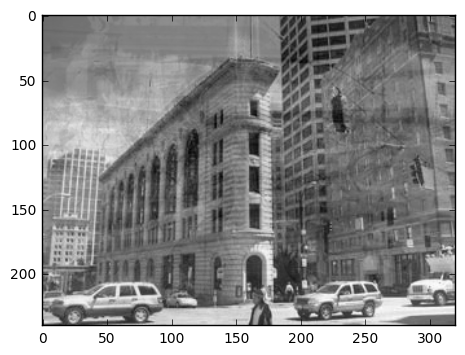

In [124]:
plt.imshow(centered_images[0].numpy()[6])

### Variance Calc

In [105]:
sqr_images = F.conv2d(centered_images.pow(2),torch.Tensor(mean_filter))

In [106]:
standard_deviation = sqr_images.sqrt()

In [107]:
new_images = centered_images/ standard_deviation

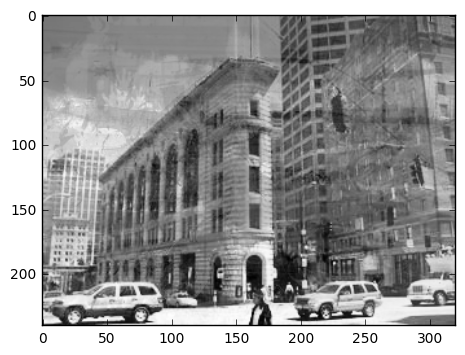

In [125]:
plt.imshow(new_images[0][6].numpy())

In [112]:
for i in range(8):
    h = new_images[0][i].numpy()
    plt.imsave('SWs/{}_sw.png'.format(i),arr=h,cmap='gray')

In [117]:
for i in range(8):
    h = grayscaled_images[0][i].numpy()
    plt.imsave('SWs/{}.png'.format(i),arr=h,cmap='gray')